In [540]:
from numpy import inf


In [731]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import absolute

# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std

In [542]:
train=pd.read_csv("/content/train_BRCpofr.csv")
test=pd.read_csv("/content/test_koRSKBP (1).csv")

In [543]:
train.shape

(89392, 12)

In [544]:
test.shape

(59595, 11)

In [545]:
train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [546]:
test.describe()

,id,marital_status,vintage,claim_amount
count,59595.000000,59595.000000,59595.000000,59595.000000
mean,119190.000000,0.576928,4.620304,4368.504321
std,17203.738983,0.494051,2.282511,3288.132408
min,89393.000000,0.000000,0.000000,0.000000
25%,104291.500000,0.000000,3.000000,2398.000000
50%,119190.000000,1.000000,5.000000,4106.000000
75%,134088.500000,1.000000,6.000000,6104.000000
max,148987.000000,1.000000,8.000000,32534.000000


In [547]:
train["marital_status"]=train["marital_status"].astype("object")
test["marital_status"]=test["marital_status"].astype("object")

In [548]:
train["policy_type"] = train["policy"] + "_" + train["type_of_policy"]
train[["type_of_policy", "policy", "policy_type"]].head()

,type_of_policy,policy,policy_type
0,Platinum,A,A_Platinum
1,Platinum,A,A_Platinum
2,Platinum,A,A_Platinum
3,Platinum,A,A_Platinum
4,Gold,A,A_Gold


In [549]:
train=train.drop(["type_of_policy","policy"],axis=1)

In [550]:
test["policy_type"] = test["policy"] + "_" + test["type_of_policy"]
test[["type_of_policy", "policy", "policy_type"]].head()

,type_of_policy,policy,policy_type
0,Silver,B,B_Silver
1,Platinum,A,A_Platinum
2,Gold,B,B_Gold
3,Silver,B,B_Silver
4,Silver,B,B_Silver


In [551]:
test=test.drop(["type_of_policy","policy"],axis=1)

In [552]:
# create a list for all categorical column names of  train data
cat_cols = ['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'num_policies',  'policy_type','vintage_ranges']

# create a list for all numerical column names
num_cols = train.columns[~train.columns.isin(cat_cols)]
print(num_cols)
# remove target column
num_cols = num_cols.delete(-1)

num_cols

Index(['vintage', 'claim_amount', 'cltv'], dtype='object')


Index(['vintage', 'claim_amount'], dtype='object')

In [553]:
# create a list for all categorical column names of test data
cat_cols = ['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'num_policies',  'policy_type','vintage_ranges']

# create a list for all numerical column names
num_cols = test.columns[~test.columns.isin(cat_cols)]
print(num_cols)
# remove target column
num_cols = num_cols.delete

num_cols

Index(['vintage', 'claim_amount'], dtype='object')


<bound method Index.delete of Index(['vintage', 'claim_amount'], dtype='object')>

In [554]:
#EXPLORATORY DATA ANALYSIS

In [555]:
train=train.drop(["id"],axis=1)
test=test.drop(["id"],axis=1)

In [556]:
test.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy_type'],
      dtype='object')

In [557]:
#now lets check for outliers

In [558]:
train.dtypes

gender            object
area              object
qualification     object
income            object
marital_status    object
vintage            int64
claim_amount       int64
num_policies      object
cltv               int64
policy_type       object
dtype: object

In [559]:

train=train[train["vintage"]!=0]

In [560]:
#outlier detection

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


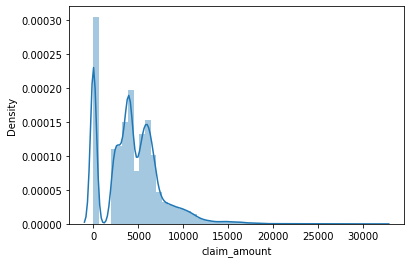

In [561]:
sns.distplot(train["claim_amount"])

In [562]:
train['log_claim_amount'] = np.log(train['claim_amount'])
# We created a new column to store the log values

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [563]:
train["log_claim_amount"] = train["log_claim_amount"].replace(to_replace= -inf, value=0.0)

In [564]:
test['log_claim_amount'] = np.log(test['claim_amount'])

In [565]:
test["log_claim_amount"] = test["log_claim_amount"].replace(to_replace= -inf, value=0.0)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


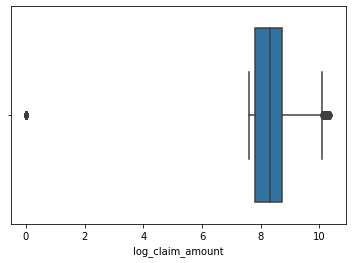

In [566]:
sns.boxplot(train["log_claim_amount"])#there are so many outliers but one thing we can identify is that we can convert them to different categories like when claim ammount is greater than 9.5-higher clain which eventually decrease company profits and the other case as normal case so we will convert this column into a categorical case

In [567]:
train["log_claim_amount"].describe()


count    85361.000000
mean         6.843841
std          3.386530
min          0.000000
25%          7.797702
50%          8.319961
75%          8.717846
max         10.370173
Name: log_claim_amount, dtype: float64

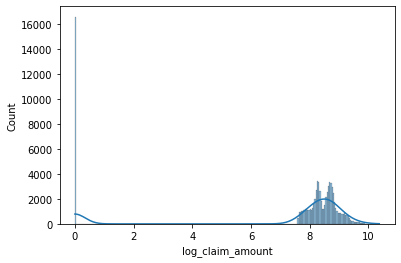

In [568]:
sns.histplot(train["log_claim_amount"],kde=True)

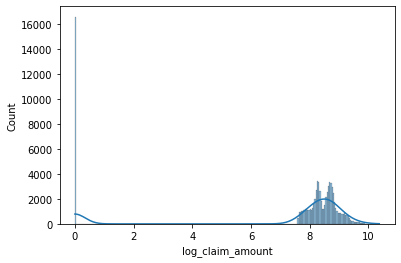

In [569]:
sns.histplot(train["log_claim_amount"],kde=True)

In [570]:
train=train.drop(["claim_amount"],axis=1)

In [571]:
test

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy_type,log_claim_amount
0,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B_Silver,7.665753
1,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A_Platinum,8.319230
2,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B_Gold,7.981050
3,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B_Silver,0.000000
4,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B_Silver,9.551018
...,...,...,...,...,...,...,...,...,...,...
59590,Male,Rural,Bachelor,5L-10L,1,6,0,1,A_Silver,0.000000
59591,Male,Urban,High School,5L-10L,0,6,0,1,C_Gold,0.000000
59592,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B_Platinum,8.108623
59593,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A_Silver,7.967627


In [572]:
test=test.drop(["claim_amount"],axis=1)

In [573]:
test.head()

,gender,area,qualification,income,marital_status,vintage,num_policies,policy_type,log_claim_amount
0,Female,Rural,High School,5L-10L,0,6,More than 1,B_Silver,7.665753
1,Female,Urban,High School,2L-5L,0,4,More than 1,A_Platinum,8.319230
2,Male,Rural,High School,5L-10L,1,7,More than 1,B_Gold,7.981050
3,Female,Rural,Bachelor,More than 10L,1,2,More than 1,B_Silver,0.000000
4,Female,Urban,High School,2L-5L,0,5,More than 1,B_Silver,9.551018


In [574]:
bins=[-1,3,6,9]
groups=['recentcustomer','middlecustomer','oldcustomer']
train["vintage_ranges"] = pd.cut(train["vintage"],bins=bins,labels=groups)
train[["vintage_ranges","vintage"]].head()

,vintage_ranges,vintage
0,middlecustomer,5
1,oldcustomer,8
2,oldcustomer,8
3,oldcustomer,7
4,middlecustomer,6


In [575]:
train=train.drop(["vintage"],axis=1)

In [576]:
bins=[-1,3,6,9]
groups=['recentcustomer','middlecustomer','oldcustomer']
test["vintage_ranges"] = pd.cut(test["vintage"],bins=bins,labels=groups)
test[["vintage_ranges","vintage"]].head()

,vintage_ranges,vintage
0,middlecustomer,6
1,middlecustomer,4
2,oldcustomer,7
3,recentcustomer,2
4,middlecustomer,5


In [577]:
test=test.drop(["vintage"],axis=1)

In [578]:
train.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'num_policies', 'cltv', 'policy_type', 'log_claim_amount',
       'vintage_ranges'],
      dtype='object')

In [579]:
test.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'num_policies', 'policy_type', 'log_claim_amount', 'vintage_ranges'],
      dtype='object')

In [580]:
#converting categorical to numerical data

In [581]:
def preprocess_data(data) :
    
    
    # dummify categorical features
    data = pd.get_dummies(data, drop_first = True)

    return data

In [582]:
train1=preprocess_data(train)

In [583]:
test1=preprocess_data(test)

In [584]:
#feautureselection

In [585]:
# independent variables
X = train1.drop('cltv', axis = 1)

# dependent variable
y = train1["cltv"]

In [586]:
from sklearn.model_selection import train_test_split

In [587]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.65859514 0.01819409 0.01342843 0.02643462 0.00693126 0.01668094
 0.00624594 0.01131079 0.00540327 0.14012923 0.01478765 0.01168386
 0.00636347 0.00596575 0.00323743 0.00388067 0.00492666 0.0047525
 0.02288695 0.01816137]


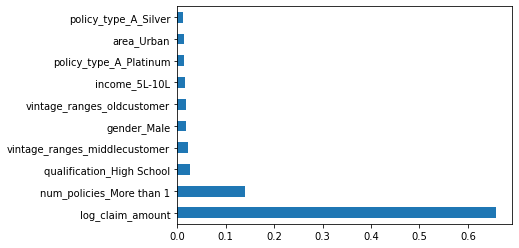

In [588]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [589]:
feat_importances=feat_importances.nlargest(10)

In [590]:
feat_importances.keys

<bound method Series.keys of log_claim_amount                 0.658595
num_policies_More than 1         0.140129
qualification_High School        0.026435
vintage_ranges_middlecustomer    0.022887
gender_Male                      0.018194
vintage_ranges_oldcustomer       0.018161
income_5L-10L                    0.016681
policy_type_A_Platinum           0.014788
area_Urban                       0.013428
policy_type_A_Silver             0.011684
dtype: float64>

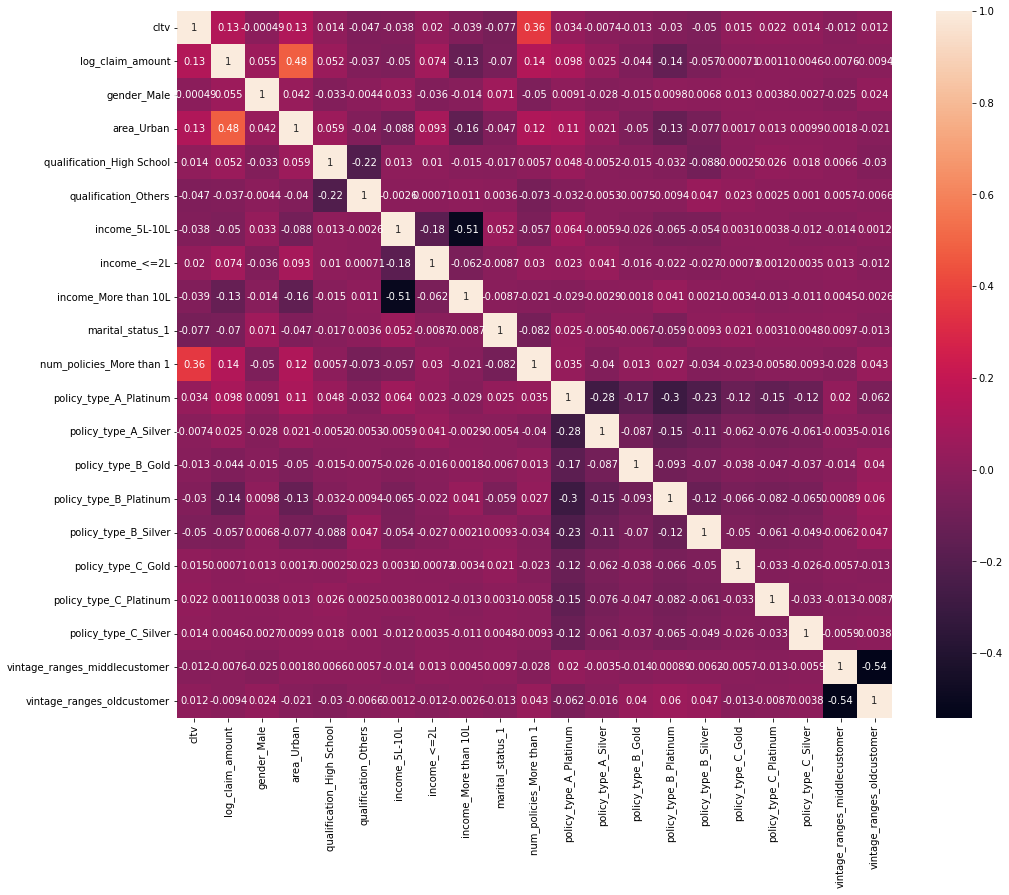

In [591]:
plt.figure(figsize=(16,13))

sns.heatmap(train1.corr(),annot=True)

In [651]:
train1.columns

Index(['cltv', 'log_claim_amount', 'gender_Male', 'area_Urban',
       'qualification_High School', 'qualification_Others', 'income_5L-10L',
       'income_<=2L', 'income_More than 10L', 'marital_status_1',
       'num_policies_More than 1', 'policy_type_A_Platinum',
       'policy_type_A_Silver', 'policy_type_B_Gold', 'policy_type_B_Platinum',
       'policy_type_B_Silver', 'policy_type_C_Gold', 'policy_type_C_Platinum',
       'policy_type_C_Silver', 'vintage_ranges_middlecustomer',
       'vintage_ranges_oldcustomer'],
      dtype='object')

In [708]:
X2=train1[["num_policies_More than 1","log_claim_amount","income_5L-10L",'income_More than 10L','marital_status_1', 'qualification_Others','policy_type_A_Platinum','area_Urban','vintage_ranges_middlecustomer']]

In [722]:
X2_test=test1[["num_policies_More than 1","log_claim_amount","income_5L-10L",'income_More than 10L','marital_status_1','qualification_Others','policy_type_A_Platinum','area_Urban','vintage_ranges_middlecustomer']]

In [710]:
X2_test.shape

(59595, 10)

In [697]:
y2 = train1["cltv"]

In [711]:
X_train, X_test, y_train, y_test = train_test_split(
    X2, y2, test_size=0.3, random_state=101)
  
# creating a regression model
model = LinearRegression()
  
# fitting the model
model.fit(X_train, y_train)
  
# making predictions
predictions = model.predict(X_test)
  
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('r2_score : ', r2_score(y_test, predictions))

mean_squared_error :  7216604389.993614
mean_absolute_error :  52226.923974631434
r2_score :  0.14060034303876656


In [712]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model2= RandomForestRegressor(n_estimators=500, max_depth=6, min_samples_split=8, min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features='log2', n_jobs=-1)
model2.fit(X_train, y_train)
  
# making predictions
predictions = model2.predict(X_test)
  
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('r2_score : ', r2_score(y_test, predictions))

mean_squared_error :  7113420157.05757
mean_absolute_error :  51073.79326556523
r2_score :  0.1528881850205165


In [713]:
rf=RandomForestRegressor(n_estimators=60,max_depth=40,max_features='sqrt')

In [714]:
rf.fit(X_train, y_train)
# making predictions
predictions = rf.predict(X_test)
  
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('r2_score : ', r2_score(y_test, predictions))

mean_squared_error :  9524519543.442997
mean_absolute_error :  57377.64807397816
r2_score :  -0.13424103442681834


In [715]:
#trying with GBR

In [716]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [717]:
# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
  
# Fit to training set
gbr.fit(X_train, y_train)
  
# Predict on test set
pred_test = gbr.predict(X_test)

In [718]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, pred_test))
print('mean_absolute_error : ', mean_absolute_error(y_test,pred_test))
print('r2_score : ', r2_score(y_test, pred_test))

mean_squared_error :  7110196299.517323
mean_absolute_error :  51210.85740270658
r2_score :  0.15327210270734737


In [719]:
gbr1 =GradientBoostingRegressor(learning_rate=0.04)
# Fit to training set
gbr1.fit(X_train, y_train)
  
# Predict on test set
pred_test = gbr1.predict(X_test)

In [720]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, pred_test))
print('mean_absolute_error : ', mean_absolute_error(y_test,pred_test))
print('r2_score : ', r2_score(y_test, pred_test))

mean_squared_error :  7104432414.622506
mean_absolute_error :  51148.661250792495
r2_score :  0.15395850318514526


In [732]:
gbc = GradientBoostingRegressor()
parameters = {
    "n_estimators":[5,250,500],
    "max_depth":[1,3,5,9],
    "learning_rate":[0.01,0.1,10]
}
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train, y_train)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/usr/local/lib

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 10],
                         'max_depth': [1, 3, 5, 9],
                         'n_estimators': [5, 250, 500]})

In [734]:
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [736]:
gbr1 =GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=500)
# Fit to training set
gbr1.fit(X_train, y_train)
  
# Predict on test set
pred_test = gbr1.predict(X_test)
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, pred_test))
print('mean_absolute_error : ', mean_absolute_error(y_test,pred_test))
print('r2_score : ', r2_score(y_test, pred_test))


mean_squared_error :  7103626490.757941
mean_absolute_error :  51161.614862060705
r2_score :  0.15405447778141157


In [739]:
sample_scores=gbr1.predict(X2_test)

In [740]:
sample43=pd.read_csv("/content/sample_submission.csv")
sample43["cltv"]=sample_scores

In [741]:
sample43.to_csv('jobathon6sj.csv', index=False)

In [742]:
sample43


,id,cltv
0,89393,98650.114783
1,89394,126670.740732
2,89395,100129.276971
3,89396,92961.877712
4,89397,152144.200383
...,...,...
59590,148983,48581.486339
59591,148984,49362.269899
59592,148985,114425.697564
59593,148986,106328.493314
